<a href="https://colab.research.google.com/github/rpizarrog/probabilidad-y-estad-stica/blob/master/2024/Caso_13_Variabes_aleatorias_discretas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objetivo

Calcular probabilidades de variables aleatorias discretas.

Mediante la identificación de variables aleatorias discretas, a través de funciones previamene codificadas y personalizadas se determinan
probabilidades, probabilidades acumuladas, valor esperado, varianza y desviación estándar de variables discretas.

Se presenta tabla de distribución de probabildiad y la
visualización gráfica en diagrama de barra de la probabilidad
de cada variable aleatoria discreta y la probabilidad acumulada con una gráfica lineal.



# Marco de referencia

Una variable aleatoria es una descripción numérica del resultado de un experimento [@anderson2008c].

Las variables aleatorias deben tomar valores numéricos. En efecto, una variable aleatoria asocia un valor numérico a cada uno de los resultados experimentales.

El valor numérico de la variable aleatoria depende del resultado del experimento. Una variable aleatoria puede ser discreta o continua, depende del tipo de valores numéricos que asuma.[@anderson_estadistica_2008].

Para este documento se tratan únicamente variables del tipo discreta.

En cualquier experimento aleatorio, los resultados se presentan al azar; así, a este se le denomina variable aleatoria. Por ejemplo, lanzar un dado constituye un experimento: puede ocurrir cualquiera de los seis resultados posibles. Cada valor de la variable aleatoria se relaciona con una probabilidad que indica la posibilidad de un resultado determinado [@lind_estadistica_2015].

En su libro [@walpole_probabilidad_2012] define que una variable aleatoria es una función que asocia un número real con cada elemento del espacio muestral.

Una función de probabilidad, una función de masa de probabilidad o una distribución de probabilidad de la variable aleatoria discreta X si, para cada resultado x posible.

Toda función de probabilidad debe ser mayor o igual que $0$. $$f(x) \geq 0$$

Indistintamente se puede expresar la probabilidad en varaibles discretas de la siguiente manera:
$$
f(x) = P(x)
$$

La suma de las probabilidad de todas las variables $x$ debe ser igual a $1$ o la suma de los valores de cada función de probabilidad con respecto a $x$ debe ser $1$ $$\sum _xf(x) = 1$$

La probabilidad de cada variable $x$ es igual a la función de probabilidad con respeto a $x$ $$P(X=x) = f(x)$$ [@walpole_probabilidad_2012].

Por otra parte, la función de la distribución acumulativa F(x) ó probabilidad acumulada de una variable aleatoria discreta $X$ con distribución de probabilidad $f(x)$ está dada por la suma de sus probabilidades de $t$ siendo $t$ menor o igual a $x$. Es decir, la probabilidad acumulada suma los valores de las funciones de probabilidad a partir del valor inicial de $x$. El valor final con respecto a valor final de $x$ debe ser igual a 1. $$F(x)=P(X \le x) = \sum_{t \le x}f(t)$$ [@walpole_probabilidad_2012].

La media de una distribución discreta es también recibe el nombre de valor esperado. Se trata de un promedio ponderado de los posibles valores de una variable aleatoria se ponderan con sus correspondientes probabilidades de ocurrencia [@lind_estadistica_2015]

La fórmula para el valor esperado
 (VE) es: $$\mu = \sum x \cdot f(x)$$

La varianza de una distribución discreta constituye un valor típico para resumir una distribución de probabilidad discreta, describe el grado de dispersión (variación) en una distribución [@lind_estadistica_2015].

Su fórmula es: $$\alpha^2 = \sum(x-\mu)^2\cdot f(x)$$

La fórmula anterior significa:

La media se resta el valor esperado VE o $\mu$ y la diferencia se eleva al cuadrado.

Cada diferencia al cuadrado se multiplica por su probabilidad $f(x)$.

Se suman los productos resultantes para obtener la varianza.

La desviación estándar, $\alpha$, se determina al extraer la raíz cuadrada positiva de $\alpha^2$; es decir, $\alpha = \sqrt{\alpha^2}$ [@lind_estadistica_2015].



# Desarrollo



## Cargar librerías



In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt # gráficos
from IPython.display import display, HTML # Para ver HTML

from itertools import combinations # Para combinaciones

## Crear funciones preparadas

Las funciones son reutilizables a lo largo del caso.



In [25]:
def f_crear_tabla_prob(x, casos):
  n = sum(casos)
  probabilidades = casos / n
  acumulada = np.cumsum(probabilidades)  # Acumulada

  data = {
    'x': x,
    'casos': casos,
    'f(x). Prob': probabilidades,
    'F(x). Acum': acumulada,
    'VE':x * probabilidades,
    # 'var':(x - (x * probabilidades))**2 * probabilidades
  }

  tabla = pd.DataFrame(data)
  VE = sum(tabla['VE'])
  tabla['var'] = (tabla['x'] - VE) ** 2 * tabla['f(x). Prob']
  var = sum(tabla['var'])
  desv_std = np.sqrt(var)
  return tabla, VE, var, desv_std, n

# Recibe la tabla y genera diagrama de barra de probabilida f(x)
# y diagrama de probabilidad acumulada F(x).
def f_graficos_probabilidad_discreta(tabla):
    # Crear un DataFrame a partir de la tabla de probabilidad
    df = pd.DataFrame(tabla)

    VE = sum(df['VE'])
    desv_sd = np.sqrt(sum(df['var']))
    # Gráfico de barras de probabilidad
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.bar(df.index, df['f(x). Prob'], color='skyblue')

    # Dibujar una línea punteada vertical en un valor específico del eje x
    plt.axvline(x=VE, color='red', linestyle='--', label=f'VE = {np.round(VE, 2)}')
    plt.axvline(x=VE - desv_std, color='green', linestyle='--', label=f'ds = {np.round(desv_std, 2)}')
    plt.axvline(x=VE + desv_std, color='green', linestyle='--')
    plt.legend()  # Mostrar la leyenda


    plt.xticks(df.index, df['x'])  # Establecer etiquetas personalizadas en el eje x
    plt.xlabel('x')
    plt.ylabel('Probabilidad')
    plt.title('Gráfico de Barras de Probabilidad')

    # Gráfico lineal de probabilidad acumulada
    plt.subplot(1, 2, 2)
    plt.plot(df.index, df['F(x). Acum'], marker='o', color='green')
    plt.xticks(df.index, df['x'])  # Establecer etiquetas personalizadas en el eje x
    plt.xlabel('x')
    plt.ylabel('Probabilidad Acumulada')
    plt.title('Gráfico Lineal de Probabilidad Acumulada')

    plt.tight_layout()
    plt.show()

## Ejercicios

Para cada ejercicio, se describe y define su contexto.

Se construye su tabla de probabilidad que contenga los valores de la variable aleatoria discreta, la función de probabilidad y su función acumulada, la gráfica de barra de los valores de las variables aleatoria y la gráfica lineal de la función acumulada.

Con la tabla de probabilidades en algunos ejercicios se determinan y calculan probabilidades.

Se determina el valor esperado de cada ejercicio.

Se determina la varianza y la desviación estándar de la distribución de las variables discretas.

# Desarrollo

## Billetes para rifa

Se venden 5000 billetes para una rifa a 1 euro cada uno. Existe un único premio de cierta cantidad, calcular los valores de las variables aleatorias y sus probabilidades para 0 para no gana y 1 para si gana cuando un comprador adquiere cincuenta billetes.

$$
\text{1 boleto de 5000 es: } \frac{1}{5000} = 0.0002 \\
\text {50 boletos de 5000 es: } 0.0002 * 50 = 0.01
$$

Si compra 50 boletos la probabilidad de ganar es 0.01, la probabilidad de perder o no ganar es 0.99.

$$
x_{i=0} = 0.99 \\
x_{i=1} = 0.01
$$








### Inicializar datos, construir tabla de probabilidad y generar estadísticos

In [16]:
discretas = np.array([0, 1])
casos = np.array([4950, 50])
# print (casos)

# La variable res recibe todo lo que regresa la función
resultado = f_crear_tabla_prob (discretas, casos)
print ("Tabla de probabilidad")


tabla = resultado[0] # Es la tabla

tabla_html = tabla.to_html(index=False, classes='table table-bordered table-striped')

# Imprimir la tabla HTML
# Mostrar la tabla directamente
display(HTML(tabla_html))

print ("Estadísticos:")
VE = resultado[1] # Valor esperado que devuelve la función
var = resultado[2] # La varianza
desv_std = resultado[3] # La desviación estándar
n = resultado[4] # valor de n

print ("n = ", n)
print ("Valor esperado es: ", np.round(VE, 4))
print ("La varianza es : ", np.round(var, 4))
print ("La desviación estándar es : ", np.round(desv_std, 4))


Tabla de probabilidad


x,casos,f(x). Prob,F(x). Acum,VE,var
0,4950,0.99,0.99,0.00,0.000099
1,50,0.01,1.00,0.01,0.009801


Estadísticos:
n =  5000
Valor esperado es:  0.01
La varianza es :  0.0099
La desviación estándar es :  0.0995


### Visualización de probabilidad

- Diagrama de barra de la probabilidad de x, $f(x)$.
- Diagrama de probabilidad acumulada $F(x)$

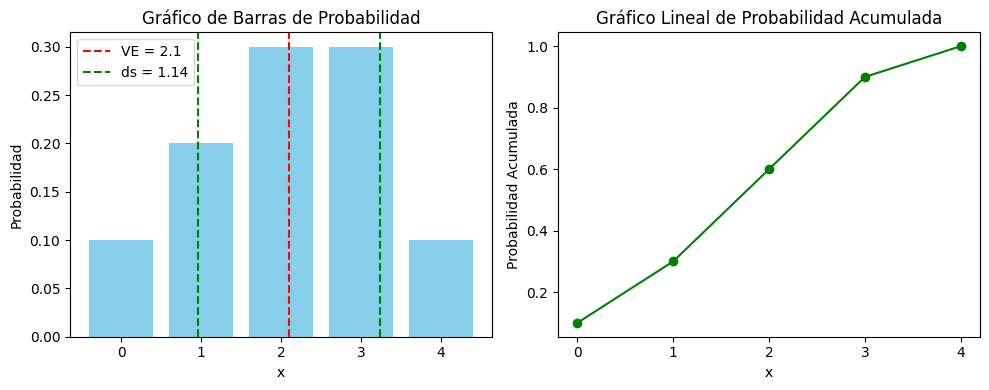

In [26]:

# Solo mandar llamar la función
f_graficos_probabilidad_discreta (tabla)


### Preguntas a contestar en la Interpretación:
- ¿Cuál es la probabilidad de ganar al comprar 50 boletos?. $f(x=1)$
- ¿Cuál es lo más probable de que suceda?. El valor esperado $\mu=$*VE*.
- ¿Cuánto puede variar?. La varianza $\sigma^2$ =*var* y *desviación estándar*$=\sqrt{(\sigma^2)}$


## Ejercicio de venta de Automóviles

Un vendedor llamado Rubén Pizarro que trabaja en ventas en una distribuidora de automóviles vende cierta cantidad de automóviles el sábado, así que desarrolló la siguiente distribución de probabilidades, en la cual se muestra la cantidad de automóviles que espera vender un sábado determinado.

La variable discreta venta de automóviles: $0,1,2,3,4$ el sábado. Los valores de la probabilidad son : $0.1, 0.2, 0.3, 0.3, 0.1$, previamente definidos.

Ya se dan las probabilidades de tal forma que la cantidad de casos no se dispone en este ejercicio.

¿De qué tipo de distribución se trata?, Resp: variables discretas

Visualizar diagrama de barra y gráfico de probabilidad acumulada.

### Inicializar datos, construir tabla de probabilidad y generar estadísticos

In [27]:
discretas = np.array([0, 1, 2, 3, 4])
probs = np.array([0.1, 0.2, 0.3, 0.3, 0.1])
casos = (probs * 10).astype(int) # Convertir a entero

# print(casos)

# La variable res recibe todo lo que regresa la función
resultado = f_crear_tabla_prob (discretas, casos)
print ("Tabla de probabilidad")
tabla = resultado[0] # Es la tabla

tabla_html = tabla.to_html(index=False, classes='table table-bordered table-striped')

# Imprimir la tabla HTML
# Mostrar la tabla directamente
display(HTML(tabla_html))

# print(tabla, '\n') # Es la tabla
print ("Estadísticos:")
VE = resultado[1] # Valor esperado que devuelve la función
var = resultado[2] # La varianza
desv_std = resultado[3] # La desviación estándar
n = resultado[4] # valor de n

print ("n = ", n)
print ("Valor esperado es: ", np.round(VE, 4))
print ("La varianza es : ", np.round(var, 4))
print ("La desviación estándar es : ", np.round(desv_std, 4))

Tabla de probabilidad


x,casos,f(x). Prob,F(x). Acum,VE,var
0,1,0.1,0.1,0.0,0.441
1,2,0.2,0.3,0.2,0.242
2,3,0.3,0.6,0.6,0.003
3,3,0.3,0.9,0.9,0.243
4,1,0.1,1.0,0.4,0.361


Estadísticos:
n =  10
Valor esperado es:  2.1
La varianza es :  1.29
La desviación estándar es :  1.1358


### Visualización de probabilidad

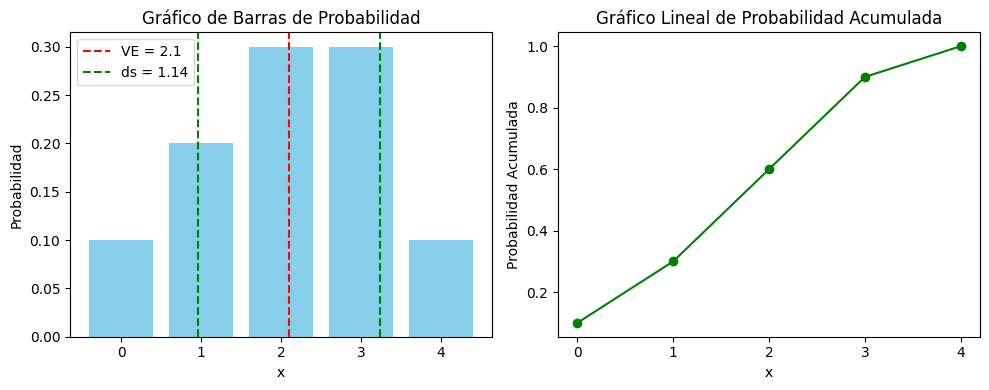

In [28]:
# Solo mandar llamar la función
f_graficos_probabilidad_discreta (tabla)

### Preguntas a contestar en interpretación

- ¿Cuántos automóviles espera vender Pizarro un sábado normal?. VE o $\mu$

- ¿Cuánto puede variar en número de automóviles que se venda?. Varianza y desviación estándar de la distribución?. $\sigma^2$ o $\sigma$

- ¿Cuál es la probabilidad de que venda mas de dos automóviles? $F(x>2)$


## Solicitudes de puestos de hombres y mujeres

Una compañía tiene cinco solicitantes para dos puestos de trabajo: dos mujeres y tres hombres. Suponga que los cinco solicitantes son igualmente calificados y que no hay preferencia para elegir su género al igual que no importa el orden de género de hombres y mujeres (combinaciones).

Sea $x$ la variable aleatoria discreta al número de mujeres elegidas para ocupar los dos puestos de trabajo. Encuentre las probabilidades para elegir 0 mujeres, 1 mujer o 2 mujeres. [@mendenhall_introduccion_2010].

Haciendo las combinaciones en donde $M = Mujer \text{ y }H = Hombre$.



### Determinar combinaciones

In [29]:
from itertools import combinations

personas = ["H1", "H2", "H3", "M1", "M2"]
r = 2  # Número de elementos en cada combinación

S_espacio_muestral = list(combinations(personas, r))

for combinacion in S_espacio_muestral:
    print(combinacion)


('H1', 'H2')
('H1', 'H3')
('H1', 'M1')
('H1', 'M2')
('H2', 'H3')
('H2', 'M1')
('H2', 'M2')
('H3', 'M1')
('H3', 'M2')
('M1', 'M2')


De acuerdo al espacio muestral $n$ con diez elementos, ¿en cúantas ocasiones hay cero mujeres?, ¿en cuántas ocasiones hay una mujer? y en cuántas ocasiones hay dos mujeres?

$$
\text{0 hay 3 casos}
$$
$$
\text{1 hay 6 casos}
$$
$$
\text{2 hay 1 caso}
$$

### Inicializar datos, construir tabla de probabilidad y generar estadísticos

In [30]:
discretas = np.array([0, 1, 2])
casos = np.array([3, 6, 1])
# La variable res recibe todo lo que regresa la función
resultado = f_crear_tabla_prob (discretas, casos)
print ("Tabla de probabilidad")
tabla = resultado[0] # Es la tabla

tabla_html = tabla.to_html(index=False, classes='table table-bordered table-striped')

# Imprimir la tabla HTML
# Mostrar la tabla directamente
display(HTML(tabla_html))

# print(tabla, '\n') # Es la tabla
print ("Estadísticos:")
VE = resultado[1] # Valor esperado que devuelve la función
var = resultado[2] # La varianza
desv_std = resultado[3] # La desviación estándar
n = resultado[4] # valor de n

print ("n = ", n)
print ("Valor esperado es: ", np.round(VE, 4))
print ("La varianza es : ", np.round(var, 4))
print ("La desviación estándar es : ", np.round(desv_std, 4))

Tabla de probabilidad


x,casos,f(x). Prob,F(x). Acum,VE,var
0,3,0.3,0.3,0.0,0.192
1,6,0.6,0.9,0.6,0.024
2,1,0.1,1.0,0.2,0.144


Estadísticos:
n =  10
Valor esperado es:  0.8
La varianza es :  0.36
La desviación estándar es :  0.6


### Visualizar probabilidad

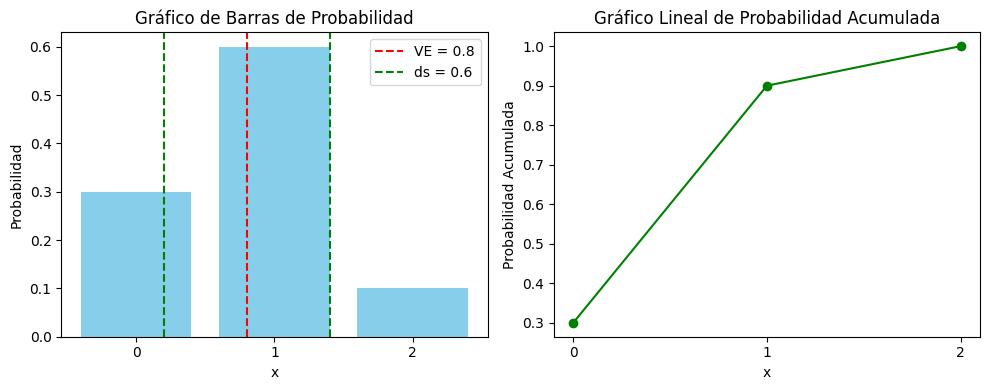

In [31]:
# Solo mandar llamar la función
f_graficos_probabilidad_discreta (tabla)

### Preguntas:
¿Cuál es la probabilidad de contratar de 1 a 2 mujeres? $F(x={{1,2}})$

¿Cual es el valor promedio de mujeres a contratar para el trabajo?. VE o $\mu$

¿Cuánto puede variar? $\sigma^2$ o $\sigma$

## Número de hijos por pareja

En la siguiente tabla se presenta la distribución del número de hijos de un grupo de 100 parejas (humanos): Ejercicio extraído de: [@web_descartes_estadistica_2018].

$$
x = \text {variable aleatoria discreta. No de hijos}
$$
$$
casos = \text{cantidad de parejas}     
$$

Son cien $n=100$ las parejas encuestadas.


$$
x = \text {{0, 1, 2, 3, 4, 5, 6} }
$$

$$
casos = \text{{15, 40, 23, 10, 7, 4, 1} }    
$$




### Inicializar datos, construir tabla de probabilidad y generar estadísticos


In [32]:
discretas = np.array([0, 1, 2, 3, 4, 5, 6])
casos = np.array([15, 40, 23, 10, 7, 4, 1])
# La variable resultado recibe todo lo que regresa la función
resultado = f_crear_tabla_prob (discretas, casos)
print ("Tabla de probabilidad")
tabla = resultado[0] # Es la tabla

tabla_html = tabla.to_html(index=False, classes='table table-bordered table-striped')

# Imprimir la tabla HTML
# Mostrar la tabla directamente
display(HTML(tabla_html))

# print(tabla, '\n') # Es la tabla
print ("Estadísticos:")
VE = resultado[1] # Valor esperado que devuelve la función
var = resultado[2] # La varianza
desv_std = resultado[3] # La desviación estándar
n = resultado[4] # valor de n

print ("n = ", n)
print ("Valor esperado es: ", np.round(VE, 4))
print ("La varianza es : ", np.round(var, 4))
print ("La desviación estándar es : ", np.round(desv_std, 4))

Tabla de probabilidad


x,casos,f(x). Prob,F(x). Acum,VE,var
0,15,0.15,0.15,0.00,0.4335
1,40,0.40,0.55,0.40,0.1960
2,23,0.23,0.78,0.46,0.0207
3,10,0.10,0.88,0.30,0.1690
4,7,0.07,0.95,0.28,0.3703
5,4,0.04,0.99,0.20,0.4356
6,1,0.01,1.00,0.06,0.1849


Estadísticos:
n =  100
Valor esperado es:  1.7
La varianza es :  1.81
La desviación estándar es :  1.3454


### Visualizar probabilidad


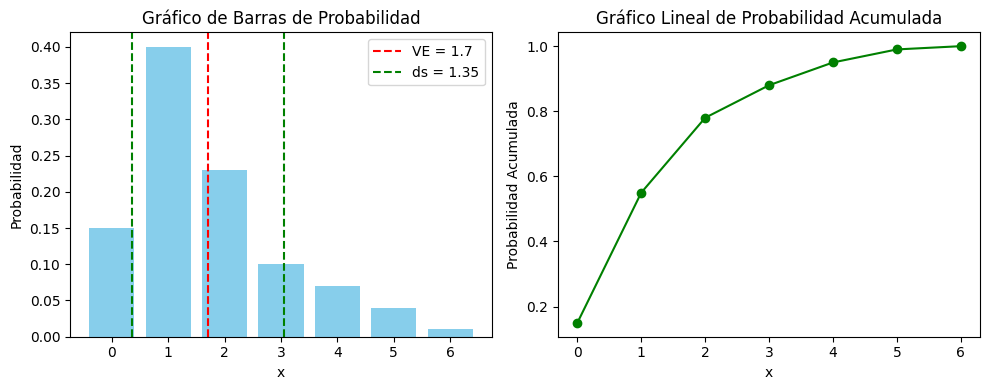

In [33]:
# Solo mandar llamar la función
f_graficos_probabilidad_discreta (tabla)

### Preguntas

¿Cuál es la probabilidad de que las parejas contesten que tienen de 2 a 3 hijos? $F(x=\text{{2,3}})$

¿Cual es la probabilidad de que las parejas contesten que tienen más de 5 hijos?. $F(x>5)$

¿Cuál es el valor esperado de una respuesta aleatoria o la media de la distribución?. VE o $\mu$

¿Cuánto puede variar? $\sigma^2$ o $\sigma$

¿A cuántos personas se les preguntó?. $n$

### Lanzamiento de un dado

Se lanza un dado perfecto 240 veces, se anota el resultado obtenido en la cara superior obteniendo los siguientes resultados:

$$
\text {{Cara superior: 1, 2, 3, 4, 5, 6} }
$$
$$
\text {{Ocasiones: 40, 39, 42, 38, 42, 39 }}
$$

### Inicializar datos, construir tabla de probabilidad y generar estadísticos

In [34]:
discretas = np.array([1, 2, 3, 4, 5, 6])
casos = np.array([40, 39, 42, 38, 42, 39])
# La variable resultado recibe todo lo que regresa la función
resultado = f_crear_tabla_prob (discretas, casos)
print ("Tabla de probabilidad")
tabla = resultado[0] # Es la tabla

tabla_html = tabla.to_html(index=False, classes='table table-bordered table-striped')

# Imprimir la tabla HTML
# Mostrar la tabla directamente
display(HTML(tabla_html))

# print(tabla, '\n') # Es la tabla
print ("Estadísticos:")
VE = resultado[1] # Valor esperado que devuelve la función
var = resultado[2] # La varianza
desv_std = resultado[3] # La desviación estándar
n = resultado[4] # valor de n

print ("n = ", n)
print ("Valor esperado es: ", np.round(VE, 4))
print ("La varianza es : ", np.round(var, 4))
print ("La desviación estándar es : ", np.round(desv_std, 4))

Tabla de probabilidad


x,casos,f(x). Prob,F(x). Acum,VE,var
1,40,0.166667,0.166667,0.166667,1.041667
2,39,0.162500,0.329167,0.325000,0.365625
3,42,0.175000,0.504167,0.525000,0.043750
4,38,0.158333,0.662500,0.633333,0.039583
5,42,0.175000,0.837500,0.875000,0.393750
6,39,0.162500,1.000000,0.975000,1.015625


Estadísticos:
n =  240
Valor esperado es:  3.5
La varianza es :  2.9
La desviación estándar es :  1.7029


### Visualizar probabilidad

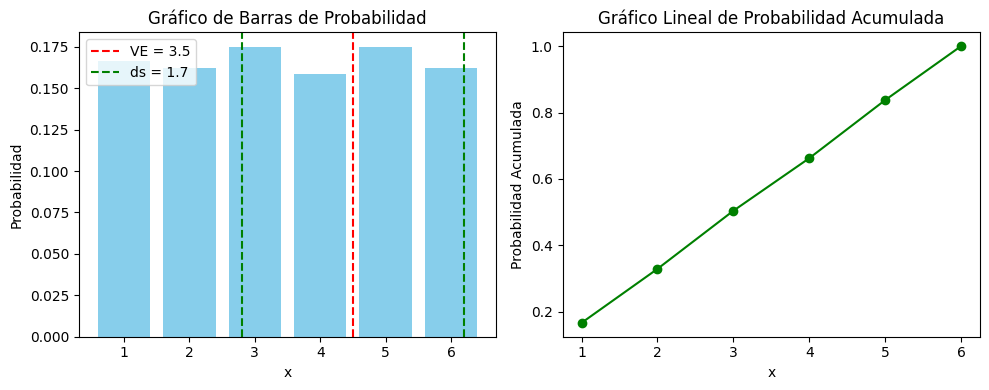

In [35]:
# Solo mandar llamar la función
f_graficos_probabilidad_discreta (tabla)

### Preguntas

De acuerdo a este dado (*dado cargado o tramposo*) y a su tabla de probabilidad:

¿Cuál es la probabilida de que la cara arriba del dado sea un par $F(x=\text{{2,  4,  6}})$?

¿Cuál es la probabilidad de que el dado sea menor o igual que 4 $F(x\le4)$?

¿Cuál es el valor que se espera que caiga el dado?. VE o $\mu$.

¿Cuánto puede variar? $\sigma^2$ ó $\sigma$.




## Número de cervezas que tomas el fin de semana

Se hizo una encuesta a estudiantes de una universidad de la región sobre ¿cuántas cervezas promedio consumen el fin de semana (viernes, sábado y domingo?)

Las repuestas fueron las siguientes:

$$
\text{x = no. cervezas. variable aleatoria}
$$
$$
\text{cantidad de cervezas}
$$

$$
\text {cervezas: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10}}
$$
$$
\text {cuantos: {2, 8, 14, 20, 30, 32, 40, 30, 25, 15, 10 }}
$$



### Inicializar datos, construir tabla de probabilidad y generar estadísticos


In [ ]:
discretas = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
casos = np.array([2, 8, 14, 20, 30, 32, 40, 30, 25, 15, 10 ])
# La variable resultado recibe todo lo que regresa la función
resultado = f_crear_tabla_prob (discretas, casos)
print ("Tabla de probabilidad")
tabla = resultado[0] # Es la tabla

tabla_html = tabla.to_html(index=False, classes='table table-bordered table-striped')

# Imprimir la tabla HTML
# Mostrar la tabla directamente
display(HTML(tabla_html))

# print(tabla, '\n') # Es la tabla
print ("Estadísticos:")
VE = resultado[1] # Valor esperado que devuelve la función
var = resultado[2] # La varianza
desv_std = resultado[3] # La desviación estándar
n = resultado[4] # valor de n

print ("n = ", n)
print ("Valor esperado es: ", np.round(VE, 4))
print ("La varianza es : ", np.round(var, 4))
print ("La desviación estándar es : ", np.round(desv_std, 4))

Tabla de probabilidad


x,casos,f(x). Prob,F(x). Acum,VE,var
0,2,0.008850,0.008850,0.000000,0.275508
1,8,0.035398,0.044248,0.035398,0.742413
2,14,0.061947,0.106195,0.123894,0.793779
3,20,0.088496,0.194690,0.265487,0.588900
4,30,0.132743,0.327434,0.530973,0.331232
5,32,0.141593,0.469027,0.707965,0.047574
6,40,0.176991,0.646018,1.061947,0.031274
7,30,0.132743,0.778761,0.929204,0.267797
8,25,0.110619,0.889381,0.884956,0.648021
9,15,0.066372,0.955752,0.597345,0.776470


Estadísticos:
n =  226
Valor esperado es:  5.5796
La varianza es :  5.3676
La desviación estándar es :  2.3168


### Visualizar probabilidad


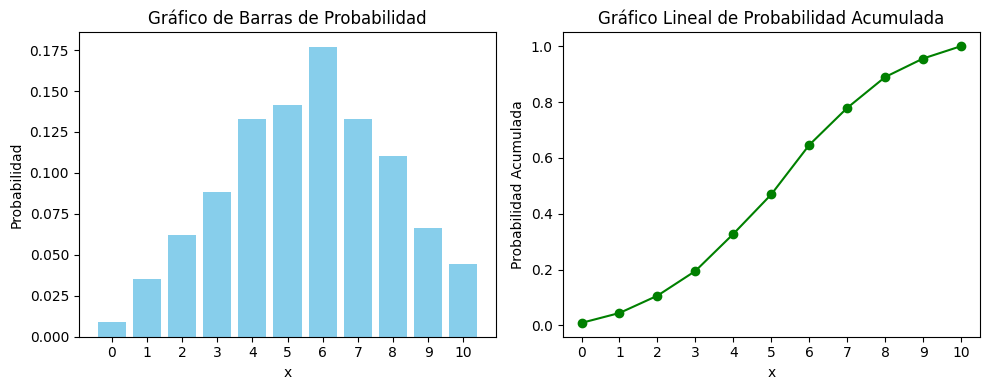

In [ ]:
# Solo mandar llamar la función
f_graficos_probabilidad_discreta (tabla)

### Preguntas

- ¿Cual es el valor esperado del número de cerveza que los estudiantes consumen en fin de semana?
- ¿Cuánto puede variar?
- ¿Cuál es la probabilidad de que consuman de 1 a 6 cervezas? $F(x = \text{{1,2,3,4,5,6}})$
¿Cuál es la probabilidad de que consuman entre 8 y 10 cervezas por fin de semana?. $F(x = \text{{8, 9, 10}})$

### Ejercicio de distancia promedio que se camina al día

[texto del vínculo](https://classroom.google.com/c/NjE4OTk0NjczMjAw)

Se trata de una encuesta realziada a los alumnos de una universidad para preguntarlse cuantó caminan en promedio al día.

Con una aplicación móvil de contar  el numero de pasos se hizo la cpnversión a kilómetros siendo esta la varible aleatoria discreta (entero).

En el enlace la tabla de probabilidad:

$$
\text{ x  = {0, 1, 2, 3, 4, 5, 6}} $$

$$
\text{ cuántos = {3, 15, 20, 30, 32, 18, 10}}
$$




### Inicializar datos, construir tabla de probabilidad y generar estadísticos


In [ ]:
discretas = np.array([0, 1, 2, 3, 4, 5, 6])
casos = np.array([3, 15, 20, 30, 32, 18, 10])
# La variable resultado recibe todo lo que regresa la función
resultado = f_crear_tabla_prob (discretas, casos)
print ("Tabla de probabilidad")
tabla = resultado[0] # Es la tabla

tabla_html = tabla.to_html(index=False, classes='table table-bordered table-striped')

# Imprimir la tabla HTML
# Mostrar la tabla directamente
display(HTML(tabla_html))

# print(tabla, '\n') # Es la tabla
print ("Estadísticos:")
VE = resultado[1] # Valor esperado que devuelve la función
var = resultado[2] # La varianza
desv_std = resultado[3] # La desviación estándar
n = resultado[4] # valor de n

print ("n = ", n)
print ("Valor esperado es: ", np.round(VE, 4))
print ("La varianza es : ", np.round(var, 4))
print ("La desviación estándar es : ", np.round(desv_std, 4))

Tabla de probabilidad


x,casos,f(x). Prob,F(x). Acum,VE,var
0,3,0.023438,0.023438,0.000000,0.255960
1,15,0.117188,0.140625,0.117188,0.622451
2,20,0.156250,0.296875,0.312500,0.265970
3,30,0.234375,0.531250,0.703125,0.021758
4,32,0.250000,0.781250,1.000000,0.120865
5,18,0.140625,0.921875,0.703125,0.404168
6,10,0.078125,1.000000,0.468750,0.567555


Estadísticos:
n =  128
Valor esperado es:  3.3047
La varianza es :  2.2587
La desviación estándar es :  1.5029


### Visualizar probabilidades

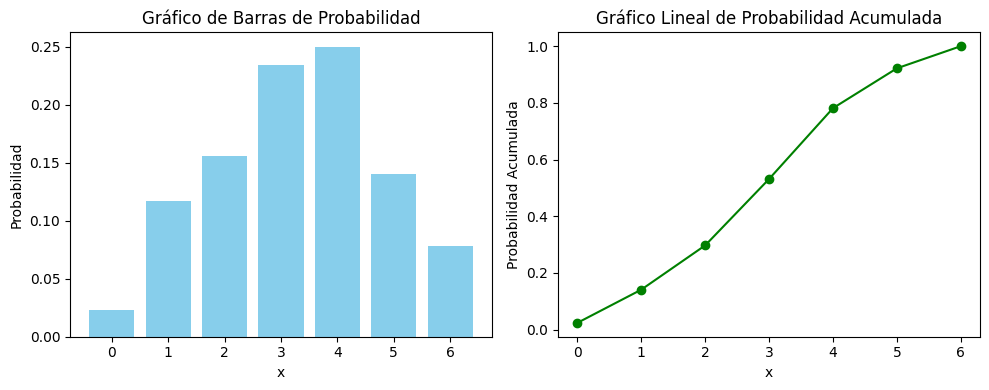

In [ ]:
# Solo mandar llamar la función
f_graficos_probabilidad_discreta (tabla)

### Preguntas

Si se le pregunta a un alumno cuanto camina:

- ¿Cuál es el valor promedio esperado de distancia en kms recorrido?, lo que se espera de la respuesta o valor esperado $\mu$.

- ¿Cuánto puede variar?. Varianza y desviación estándar: $\sigma^2$ y $\sigma$

- ¿cuál es la probabilidad de que un alumno diga que camina 4 kilómetros?. $f(x=4)$

- ¿Cuál es la probabilidad de que la respeusta de un alumno sea que mencione que camina 10 kilómetros en promedio al día?. $f(x=10)$

- ¿Cuál es la probabilidad de que la respuesta de un alumno sea que diga que camina entre 2 y 4 ilómetros en promedio al día?. $F(x= \text{{2, 3, 4}})$

- ¿A cuántos personas se les preguntó?. $n$




## Bostezos en promedio por dia a una hora determinada.

Se hizo una encuesta a 50 alumnos preguntándoles ¿cuantos ocasiones bostezan de 10 a 11 de la mañana? en promedio. Estas fueron las respuestas en promedio durante un experimento de 5 dias.:

$x_i$ representa la cantidad de bostezos en promedio los casos son las personas que fueron encuestadas y contestaron cuantos bostezos hicieron.
$$
x_i = \text{{0, 1, 2, 3, 4, 5, 6}}
$$

$$
casos: \text{{2, 5, 10, 14, 9, 7, 5}}
$$



### Inicializar datos, construir tabla de probabilidad y generar estadísticos

In [ ]:
discretas = np.array([0, 1, 2, 3, 4, 5, 6])
casos = np.array([2, 5, 10, 14, 9, 7, 3])
# La variable resultado recibe todo lo que regresa la función
resultado = f_crear_tabla_prob (discretas, casos)
print ("Tabla de probabilidad")
tabla = resultado[0] # Es la tabla

tabla_html = tabla.to_html(index=False, classes='table table-bordered table-striped')

# Imprimir la tabla HTML
# Mostrar la tabla directamente
display(HTML(tabla_html))

# print(tabla, '\n') # Es la tabla
print ("Estadísticos:")
VE = resultado[1] # Valor esperado que devuelve la función
var = resultado[2] # La varianza
desv_std = resultado[3] # La desviación estándar
n = resultado[4] # valor de n

print ("n = ", n)
print ("Valor esperado es: ", np.round(VE, 4))
print ("La varianza es : ", np.round(var, 4))
print ("La desviación estándar es : ", np.round(desv_std, 4))

Tabla de probabilidad


x,casos,f(x). Prob,F(x). Acum,VE,var
0,2,0.04,0.04,0.00,0.389376
1,5,0.10,0.14,0.10,0.449440
2,10,0.20,0.34,0.40,0.250880
3,14,0.28,0.62,0.84,0.004032
4,9,0.18,0.80,0.72,0.139392
5,7,0.14,0.94,0.70,0.494816
6,3,0.06,1.00,0.36,0.497664


Estadísticos:
n =  50
Valor esperado es:  3.12
La varianza es :  2.2256
La desviación estándar es :  1.4918


### Visualizar probabilidad


In [ ]:
# Solo mandar llamar la función
f_graficos_probabilidad_discreta (tabla)

### Pregunta del ejercicio de bostezos

- ¿cuál es la probabilidad de encuestar a un alumno que diga que bosteza de 3 a 4 ocasiones?
- ¿Cuál es el valor esperado?
- ¿Cuánto puede variar?


## Interpretación del caso

Contestar las preguntas de cada ejercicio ... ... y describirlas aquí ... ...

# Referencias bibliograficas

- Anderson, David R., Dennis J. Sweeney, and Thomas A. Williams. 2008. Estadística Para Administración y Economía. 10th ed. Australia • Brasil • Corea • España • Estados Unidos • Japón • México • Reino Unido • Singapur: Cengage Learning,.

- Lind, Douglas, William Marchal, and Samuel Wathen. 2015. Estadística Aplicada a Los Negocios y La Economía. Decimo Sexta. México, D.F.: McGraw-Hill.

- Mendenhall, William, Robert J. Beaver, and Barbara M. Beaver. 2010. Introducción a La Probabilidad y Estadística. 13th ed. Cengage Learning Editores, S.A. de C.V.,.
- Walpole, Ronald E., Raymond H. Myers, and Sharon L. Myers. 2012. Probabilidad y Estadística Para Ingeniería y Ciencias. Novena Edición. México: Pearson.